# Results post-processing and plots

In this notebook, the outputs from the main notebook are imported and the averages with confidence intervals for each batch size is calculated. Then, we plot the results to compare with the baseline performance.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import t
import math
from scipy.stats import ttest_ind

In [2]:
# imports the macro-F1 scores for a given batch size and seeds
def import_results(batch_size,seeds):
    performance = []
    for s in seeds:
        p = np.load("Results/performanceb"+str(batch_size)+"seed"+str(s)+".npy")
        performance.append(p)
    performance = np.array(performance)
    return performance

In [3]:
# imports the baseline's macro-F1 scores according to the used seeds
def import_baseline(seeds):
    performance = []
    for s in seeds:
        p = np.load("Results/performancebaselineseed"+str(s)+".npy")
        performance.append(p)
    performance = np.array(performance)
    return performance

In [4]:
# calculates the confidence interval of the active learner performances with a 95% confidence level
def average_confidence_interval(performance):
    avg = np.average(performance,axis=0)
    
    sd = np.std(performance,axis=0)
    
    h = np.zeros(len(avg))
    
    for i in range(len(avg)):
        h[i] = t.ppf((1 + 0.95) / 2., performance.shape[1]-1)*sd[i]/math.sqrt(performance.shape[1])
    
    return avg, h

In [5]:
# calculates the confidence interval of the baseline performances with a 95% confidence level
def average_confidence_baseline(performance):
    avg = np.average(performance)
    
    sd = np.std(performance)
    
    h = t.ppf((1 + 0.95) / 2., len(performance)-1)*sd/math.sqrt(len(performance))
    
    return avg, h

In [6]:
# importing results for batch sizes 5, 10, 20 and 25 and also the baseline results
performance5 = import_results(5,np.arange(5))
performance10 = import_results(10,np.arange(5))
performance20 = import_results(20,np.arange(5))
performance25 = import_results(25,np.arange(5))
performance_base = import_baseline(np.arange(5))

In [7]:
# calculating the averages and confidence intervals
avg_performance_5, h_performance_5 = average_confidence_interval(performance5)
avg_performance_10, h_performance_10 = average_confidence_interval(performance10)
avg_performance_20, h_performance_20 = average_confidence_interval(performance20)
avg_performance_25, h_performance_25 = average_confidence_interval(performance25)
avg_performance_base, h_performance_base = average_confidence_baseline(performance_base)

In [8]:
# arrays with the number of samples added at each active learning loop iteration
x5 = np.arange(int(50/5)+1)*5
x10 = np.arange(int(50/10)+1)*10
x20 = np.arange(int(50/20)+1)*20
x25 = np.arange(int(50/25)+1)*25

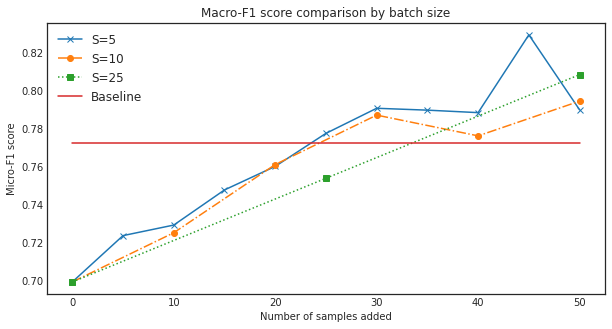

In [21]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Macro-F1 score comparison by batch size')    
    plt.plot(x5, avg_performance_5, 'x-')    
    plt.plot(x10, avg_performance_10, 'o-.')
    #plt.plot(x20, avg_performance_20, '^--')
    plt.plot(x25, avg_performance_25, 's:')
    plt.plot([0, 50], np.repeat(avg_performance_base, 2))
    plt.legend(['S=5','S=10','S=25','Baseline'], fontsize = 'large')
    plt.xlabel('Number of samples added')
    plt.ylabel('Micro-F1 score')
    plt.show()

In [10]:
print("Final S5 micro-F1 score: "+str(round(avg_performance_5[-1],4))+" +/- "+str(round(h_performance_5[-1],4)))

Final S5 micro-F1 score: 0.7896 +/- 0.0611


In [11]:
print("Final S10 micro-F1 score: "+str(round(avg_performance_10[-1],4))+" +/- "+str(round(h_performance_10[-1],4)))

Final S10 micro-F1 score: 0.7941 +/- 0.0902


In [12]:
print("Final S20 micro-F1 score: "+str(round(avg_performance_20[-1],4))+" +/- "+str(round(h_performance_20[-1],4)))

Final S20 micro-F1 score: 0.766 +/- 0.1954


In [13]:
print("Final S25 micro-F1 score: "+str(round(avg_performance_25[-1],4))+" +/- "+str(round(h_performance_25[-1],4)))

Final S25 micro-F1 score: 0.8081 +/- 0.2102


In [14]:
print("Baseline micro-F1 score: "+str(round(avg_performance_base,4))+" +/- "+str(round(h_performance_base,4)))

Baseline micro-F1 score: 0.7723 +/- 0.0828


In [15]:
performance5_last = []
for v in performance5:
    performance5_last.append(v[-1])
performance5_last = np.array(performance5_last)

In [16]:
performance5_last.var()

0.008265095961499564

In [17]:
(performance5_last.var()*performance5_last.var())/(performance_base.var()*performance_base.var())

3.462695018227718

In [18]:
ttest_ind(performance5_last,performance_base,alternative='greater',equal_var=False)

Ttest_indResult(statistic=0.30571940461118985, pvalue=0.38415617198757956)